In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
sns.set_style("whitegrid")

In [ ]:
import os
from urllib.request import urlopen
import ssl, certifi
import pandas as pd

# Ensure ../data exists (run this from src/)
os.makedirs("../data", exist_ok=True)

# Reusable SSL context (same as your olympics example)
ctx = ssl.create_default_context(cafile=certifi.where())

urls = {
    "unvotes":    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-03-23/unvotes.csv",
    "roll_calls": "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-03-23/roll_calls.csv",
    "issues":     "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-03-23/issues.csv",
}

for name, url in urls.items():
    with urlopen(url, context=ctx) as f:
        df = pd.read_csv(f)
    out_path = f"../data/{name}.csv"
    df.to_csv(out_path, index=False)
    print(f"✅ Saved to {out_path}")

In [3]:
unvotes    = pd.read_csv('../data/unvotes.csv')
roll_calls = pd.read_csv('../data/roll_calls.csv')
issues = pd.read_csv('../data/issues.csv')

## unvotes

In [ ]:
unvotes.head()

In [ ]:
unvotes.info()

In [ ]:
unvotes[unvotes["country_code"].isna()]

In [ ]:
unvotes[(unvotes["country"] == "Yemen Arab Republic") & (unvotes["country_code"].notna())]

In [ ]:
unvotes[(unvotes["country"] == "Namibia") & (unvotes["country_code"].notna())]

Lets drop `country_code` and just use `country`

## roll_calls

In [ ]:
roll_calls.head()

In [ ]:
roll_calls.info

In [ ]:
roll_calls["short"].unique()

In [ ]:
roll_calls["unres"].unique()

Is `date` and `rcid` the only important thing here, `importantvote` stopped at 1985, and are the resolution's content relevant to our qn

## issues

In [ ]:
issues.head()

In [ ]:
issues.info()

In [ ]:
issues["short_name"].unique()

In [ ]:
issues["issue"].unique()

In [ ]:
issues[issues["issue"] == "Palestinian conflict"]

Lets drop `short_name` because `issue` gives the same information, and a better description

## Huh

In [ ]:
any(unvotes.duplicated()) or any(roll_calls.duplicated()) or any(issues.duplicated())

## OK

In [4]:
unvotes = unvotes.drop("country_code", axis=1)
roll_calls = roll_calls[["rcid", "date"]]
issues = issues.drop("short_name", axis=1)

In [5]:
roll_calls["date"] = pd.to_datetime(roll_calls["date"]).dt.year

mapping = {
    "yes": 1,
    "abstain": 0,
    "no": -1
}
unvotes["vote"] = unvotes["vote"].map(mapping)

In [6]:
df = roll_calls.merge(unvotes, on="rcid").merge(issues, on="rcid")

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857878 entries, 0 to 857877
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   rcid     857878 non-null  int64 
 1   date     857878 non-null  int32 
 2   country  857878 non-null  object
 3   vote     857878 non-null  int64 
 4   issue    857878 non-null  object
dtypes: int32(1), int64(2), object(2)
memory usage: 29.5+ MB


(857878, 5)

In [49]:
df['vote'].describe()

count    857878.000000
mean          0.744938
std           0.564015
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: vote, dtype: float64

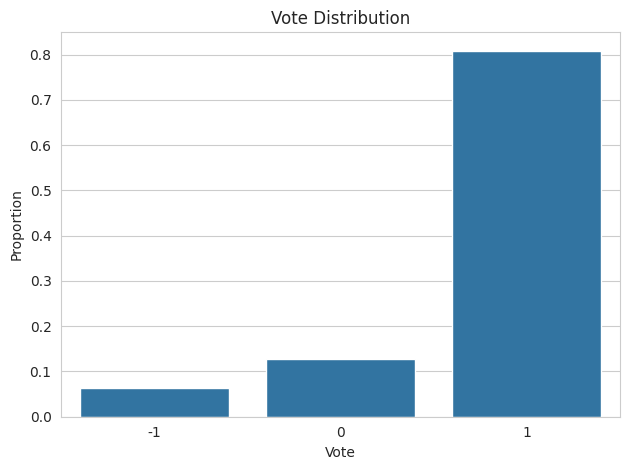

In [50]:
sns.countplot(data=df, x='vote', stat='proportion')
plt.title('Vote Distribution')
plt.ylabel('Proportion')
plt.xlabel('Vote')
plt.tight_layout()

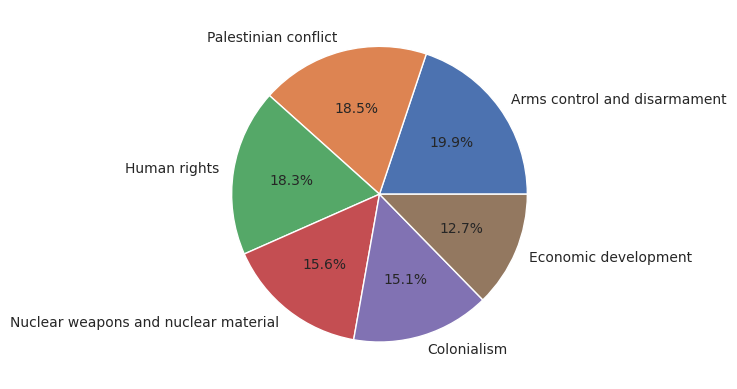

In [57]:
pi = df['issue'].value_counts()
plt.pie(pi, labels=pi.index, autopct='%1.1f%%', colors=sns.color_palette('deep'))
plt.show()

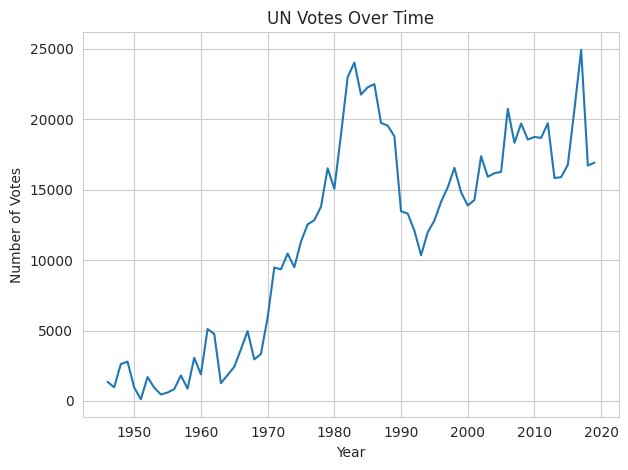

In [33]:
sns.lineplot(data=df, x='date', y='vote', estimator="count", errorbar=None)
plt.title("UN Votes Over Time")
plt.ylabel("Number of Votes")
plt.xlabel("Year")
plt.tight_layout()